In [114]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



In [115]:
# Load the data
df =pd.read_csv('shoe_size_data.csv')
df.head()

,Hight,Weight,Shoe size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M


In [116]:
df['Shoe size'].value_counts()

Shoe size
42    23
41    21
40    21
39    15
38    12
44     9
43     7
36     6
Name: count, dtype: int64

In [117]:
# correct the spelling of the first column by renaming it
df = df.rename(columns={'Hight': 'Height'})
df.head()

,Height,Weight,Shoe size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M


In [118]:
#information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Height     114 non-null    int64  
 1   Weight     114 non-null    float64
 2   Shoe size  114 non-null    int64  
 3   Gender     114 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.7+ KB


In [119]:
df['Gender'].value_counts()

Gender
M    61
F    53
Name: count, dtype: int64

In [120]:
# convert the target column to categorical 
df['Shoe size'] = df['Shoe size'].astype('category')

In [121]:
# encoding the categorical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Height,Weight,Shoe size,Gender
0,180,79.0,42,1
1,165,65.0,41,1
2,178,72.0,42,1
3,160,53.0,43,1
4,182,78.0,36,1


In [122]:
df.describe()

,Height,Weight,Gender
count,114.000000,114.000000,114.000000
mean,173.464912,94.769298,0.535088
std,13.325191,30.219349,0.500969
min,140.000000,49.000000,0.000000
25%,164.000000,68.250000,0.000000
50%,174.500000,92.000000,1.000000
75%,184.750000,117.750000,1.000000
max,197.000000,159.000000,1.000000


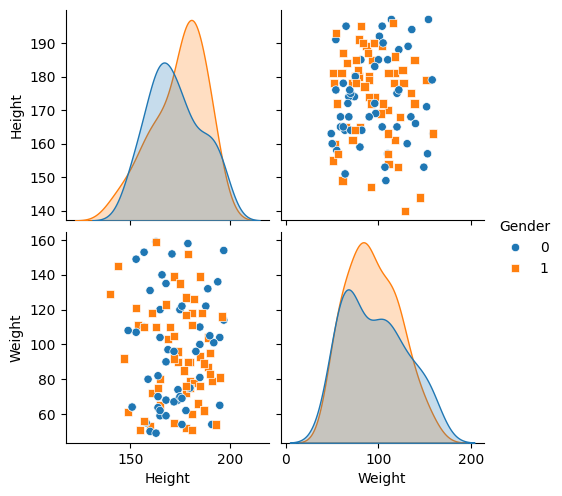

In [123]:
# Create a pairplot using seaborn
sns.pairplot(df, hue='Gender', markers=["o", "s"])

# Show the plot
plt.show()


In [124]:
from scipy.stats import chi2_contingency

# Create the DataFrame


# Create a contingency table
contingency_table = pd.crosstab(df['Shoe size'], df['Gender'])

# Perform Chi-Square Test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(ex)

# Interpretation of the result
if p < 0.05:
    print("There is a significant correlation between Shoe size and Gender (reject the null hypothesis).")
else:
    print("There is no significant correlation between Shoe size and Gender (fail to reject the null hypothesis).")


Chi-Square Statistic: 20.247347136382764
P-Value: 0.005059479922552905
Degrees of Freedom: 7
Expected Frequencies:
[[ 2.78947368  3.21052632]
 [ 5.57894737  6.42105263]
 [ 6.97368421  8.02631579]
 [ 9.76315789 11.23684211]
 [ 9.76315789 11.23684211]
 [10.69298246 12.30701754]
 [ 3.25438596  3.74561404]
 [ 4.18421053  4.81578947]]
There is a significant correlation between Shoe size and Gender (reject the null hypothesis).


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate features and target
X = df[['Height', 'Weight', 'Gender']]
y = df['Shoe size']

# Split the data with stratification on Gender
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['Shoe size'])

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [100, 200, 300]
}

# Initialize the classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV with an appropriate scoring function
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Output the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy Score: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy Score: 0.3953216374269005
Test Accuracy: 0.391304347826087


In [128]:
# Save the best model
filename = 'best_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)